<a href="https://colab.research.google.com/github/TomoharuKurosu/Tomoaharu_Kurosu_2023/blob/main/week11_NLP_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week11 - 自然言語処理、Natural Language Processing (NLP)

- [19.1 自然言語処理入門](#19.1-introduction-to-nlp)
- [19.2 テキストデータの前処理](#19.2-preprocessing-text-data)
- [19.3 テキストのトークン化 (Text Tokenization)](#19.3-text-tokenization)
    - [19.3.1 文字レベルトークン (Character-level Tokens)](#19.3.1-character-level-tokens)
    - [19.3.2 単語レベルトークン (Word-level Tokens)](#19.3.2-word-level-tokens)
    - [19.3.3 単語シーケンスのパディング (Padding)](#19.3.3-padding-word-sequences)
- [19.4 単語グループの表現手法](#19.4-representation-of-groups-of-words)
- [19.5 シーケンスモデルアプローチ](#19.5-sequence-models-approach)
    - [19.5.1 単語埋め込み (Word Embeddings)](#19.5.1-word-embeddings)
    - [19.5.2 TextVectorization レイヤーの使用](#19.5.2-using-textvectorization-layer)
    - [19.5.3 RNNによるシーケンスモデリング](#19.5.3-sequence-modeling-with-recurrent-neural-networks)

## 1. 自然言語処理とは <a name='19.1-introduction-to-nlp'></a>

**自然言語処理 (NLP)**  
- コンピュータにテキストや人間の言語を理解する能力を提供する技術  
- コンピュータサイエンスおよび人工知能の一分野  

- NLPの一般的なタスク:

  - *テキスト分類 (Text Classification)* — テキストの内容に基づいてクラスラベルを付与
      - 感情分析、スパム検出、有害コンテンツのフィルタリングなど

  - *テキスト要約/読解 (Text Summarization/Reading Comprehension)* — 長文を短い文章に要約

  - *音声認識 (Speech Recognition)* — 話し言葉をテキストに変換

  - *機械翻訳 (Machine Translation)* — ある言語から別の言語へテキストを翻訳

  - *品詞タグ付け (Part of Speech Tagging)* — 単語を名詞、動詞、副詞などに分類

  - *質問応答 (Question Answering)* — 入力された質問に対して回答を生成

  - *対話生成 (Dialog Generation)* — 会話履歴から次の応答を生成

  - *テキスト生成 (Text Generation)* — 文や段落を補完するテキストを生成


## 2 テキストデータの前処理 <a name='19.2-preprocessing-text-data'></a>

テキストデータをMLモデルで処理するには、まず数値表現に変換する必要があります。

主な変換ステップ:

1. **標準化 (Standardization)**
- 句読点の削除
- 小文字への変換

2. **トークン化 (Tokenization)**
テキストを以下のような単位に分割:
- 単語
- N個の連続単語(N-gram)
- 部分語
- 文字

3. **インデックス付け (Indexing)**
- 学習セット内の各トークンに数値インデックスを割り当て
- これにより語彙(Vocabulary)が構築される

4. **埋め込み (Embedding)**  
※最新のMLモデルで追加されるステップ
- 各トークンに数値ベクトルを割り当て
- One-hot encodingやWord embeddingなど(5節で解説) 言葉同士の距離
one-hotは一個だけ１で、あとは０

### テキストの標準化

**テキスト標準化 (Text Standardization)** の一般的なステップ:

- 句読点や特殊文字の削除 (@, #, {, ] など)
- 大文字を小文字に統一 (*Text* と *text* を同じ単語として扱う)

タスクによっては以下も適用:

- スペルミスの修正、略語の展開
- ストップワード (Stop Words) の削除
    - *for*, *the*, *is*, *to*, *some* などの一般的な語
    - テキスト分類では文の意味に関係ない

- ステミング (Stemming) とレンマ化 (Lemmatization)
    - 語を基本形に変換
    - 例: *changing* → *change*, *grilled* → *grill*

標準化のメリット:
- モデル学習の効率化
- 必要なトレーニングデータの削減

注意点:
- タスクによっては重要な情報が失われる可能性
- 前処理時は目的に応じた判断が必要

### トークン化 (Tokenization)

**トークン化**とは、テキストを個々の単位(トークン)に分割すること。

トークン化の主なレベル:

- *文字レベルトークン (Character-level tokens)*
    - テキストを個々の文字に分割
    - 効率が悪く意味の把握が困難なため、実用では稀

- *単語レベルトークン (Word-level tokens)*
    - 各単語をトークンとして扱う  
    - 言語の自然な構成単位として一般的

- *部分語レベルトークン (Subword-level tokens)*
    - 単語をさらに小さい単位に分割
    - 例: "unhappiness" → "un" + "happiness"
    - 大規模言語モデルで一般的

- *N-gramトークン (N-gram tokens)*
    - N個の連続単語を1つのトークンとして扱う
    - bigram(2語)、trigram(3語)など
    - 単語の順序情報を保持できる

他にも、文書を文に分割する場合などは文レベルのトークン化も使用。

テキストの標準化、単語レベルのトークナイゼーション、およびインデックス付けの例を以下の図に示します。

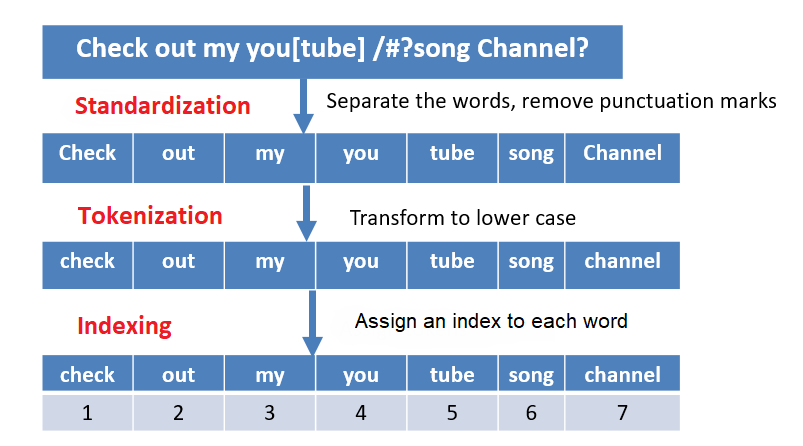
*図: テキストの標準化、単語レベルのトークン化、およびインデックス付け*

## 3 テキストのトークナイゼーション <a name='19.3-text-tokenization'></a>

テキストを解析可能な形式に変換するために、まず文章をトークン（単語、句、文字など）に分割するステップが必要。これにより各トークンが数値インデックスとして管理でき、機械学習モデルや自然言語処理タスクに応用しやすくなる。  

Keras の `Tokenizer` 関数は生のテキストをトークンのシーケンスに変換する機能を提供します。`Tokenizer` は以下の処理を実行:

- テキスト標準化
- トークン化
- インデックス付け

主なパラメータ:

- *num_words*: 保持する単語の最大数
- *filters*: 削除/保持する句読点や特殊文字
- *lower*: 小文字変換の有無 (デフォルト: True)
- *split*: 単語分割の区切り文字 (デフォルト: スペース)
- *char_level*:
    - False (デフォルト): 単語レベルのトークン化
    - True: 文字レベルのトークン化
- *oov_token* (Out Of Vocabulary Token): 未知語の置換トークン

### 3.1 文字レベルトークン <a name='19.3.1-character-level-tokens'></a>

`Tokenizer`で文字レベルのトークン化を行うには:

- `char_level=True`に設定
- トークン数は1,000に設定

以下の文章に`fit_on_texts()`メソッドを適用してみましょう。

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Print the version of tf
print("TensorFlow version:{}".format(tf.__version__))

TensorFlow version:2.17.1


In [ ]:
# A sample sentence
sentence = ['TensorFlow is a Machine Learning framework']

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

character_tokenizer = Tokenizer(num_words=1000, char_level=True)

# Fitting tokenizer on sentences
character_tokenizer.fit_on_texts(sentence)

`Tokenizer`がテキストを文字に分割すると、各文字を整数インデックスにマッピングする辞書が作成されます。

ポイント:
- `char_level=True`の場合、`word_index`属性で文字インデックスを確認可能
- インデックスは1から開始
- すべての文字は自動的に小文字に変換
- 最初のトークンは空白文字(" ")
- 2番目のトークンは文字'e'
- サンプル文には空白を含め17個のユニークな文字が存在

※技術用語:
- Tokenizer (トークナイザー)
- Character index (文字インデックス)
- word_index (単語インデックス)

In [ ]:
char_index = character_tokenizer.word_index
print(char_index)

{' ': 1, 'e': 2, 'n': 3, 'r': 4, 'a': 5, 'o': 6, 'i': 7, 's': 8, 'f': 9, 'l': 10, 'w': 11, 'm': 12, 't': 13, 'c': 14, 'h': 15, 'g': 16, 'k': 17}


`text_to_sequences`メソッドはテキストのインデックスを出力します。

`TensorFlow`という単語は以下のインデックスに変換されます:  
13, 2, 3, 8, 6, 4, 9, 10, 6, 11

各インデックスは`char_index`にリストされた文字に対応しています。

In [ ]:
print(character_tokenizer.texts_to_sequences(sentence))

[[13, 2, 3, 8, 6, 4, 9, 10, 6, 11, 1, 7, 8, 1, 5, 1, 12, 5, 14, 15, 7, 3, 2, 1, 10, 2, 5, 4, 3, 7, 3, 16, 1, 9, 4, 5, 12, 2, 11, 6, 4, 17]]


先述の通り、文字レベルのトークン化は、単語レベルのトークン化ほど単語の意味を効果的に捉えられないため、あまり使用されません。

- Character-level tokenization (文字レベルトークン化):
    - 単語の意味を効果的に捉えられない
    - ほとんど使用されない

- Word-level tokenization (単語レベルトークン化):
    - より効果的に意味を理解できる
    - 一般的に使用される

### 3.2 単語レベルトークン <a name='19.3.2-word-level-tokens'></a> Word-level Tokens <a name='19.3.2-word-level-tokens'></a>

単語をトークン化するには`Tokenizer`関数の`char_level`引数を`False`に設定します（これはデフォルト値なので省略可能です）。

要点:
- Character-level → Word-level tokenization に変更
- `char_level=False`がデフォルト設定
- 引数は省略可能

In [ ]:
# Sample sentences
sentences = ['TensorFlow is a Machine Learning framework.',
             'Keras is a well designed deep learning API!',
             'Keras is built on top of TensorFlow!']

テキストが個々の単語に分解された後、`Tokenizer`は以下の処理を行います:

- 入力テキスト内の全単語から語彙(*vocabulary*)を構築
- 語彙内の各単語に一意の整数インデックスを割り当て

※ `word_index`属性で単語とインデックスの対応を確認可能

In [ ]:
word_tokenizer = Tokenizer(num_words=1000)

# Fitting tokenizer on sentences
word_tokenizer.fit_on_texts(sentences)

word_index = word_tokenizer.word_index
print(word_index)

{'is': 1, 'tensorflow': 2, 'a': 3, 'learning': 4, 'keras': 5, 'machine': 6, 'framework': 7, 'well': 8, 'designed': 9, 'deep': 10, 'api': 11, 'built': 12, 'on': 13, 'top': 14, 'of': 15}


上記の文には15個のユニークな単語が含まれています。デフォルトでは:

- すべての句読点は削除
- すべての文字は小文字に変換

3つの文のインデックス例:
- 最初のリスト `[2, 1, 3, 6, 4, 7]` は
"TensorFlow is a Machine Learning framework" を表現

In [ ]:
print(word_tokenizer.texts_to_sequences(sentences))

[[2, 1, 3, 6, 4, 7], [5, 1, 3, 8, 9, 10, 4, 11], [5, 1, 12, 13, 14, 15, 2]]


`word_counts`は、各単語が文章中に出現する回数を返すことができます。

In [ ]:
word_counts = word_tokenizer.word_counts
word_counts

OrderedDict([('tensorflow', 2),
             ('is', 3),
             ('a', 2),
             ('machine', 1),
             ('learning', 2),
             ('framework', 1),
             ('keras', 2),
             ('well', 1),
             ('designed', 1),
             ('deep', 1),
             ('api', 1),
             ('built', 1),
             ('on', 1),
             ('top', 1),
             ('of', 1)])

#### 語彙外の単語

Tokenizer に学習データにない単語が含まれるテキストを入力する場合、`oov_token` (Out Of Vocabulary Token) を設定することで対応できます。

主なポイント:
- `oov_token` は語彙に含まれない単語の代替トークン
- 以下の例では `'Word Out of Vocab'` を `oov_token` として設定
- この `oov_token` にはインデックス `1` が割り当てられる

In [ ]:
word_tokenizer_2 = Tokenizer(num_words=1000, oov_token='Word Out of Vocab')
word_tokenizer_2.fit_on_texts(sentences)
word_index = word_tokenizer_2.word_index
print(word_index)

{'Word Out of Vocab': 1, 'is': 2, 'tensorflow': 3, 'a': 4, 'learning': 5, 'keras': 6, 'machine': 7, 'framework': 8, 'well': 9, 'designed': 10, 'deep': 11, 'api': 12, 'built': 13, 'on': 14, 'top': 15, 'of': 16}


In [ ]:
# Converting text to sequences
print(word_tokenizer_2.texts_to_sequences(sentences))

[[3, 2, 4, 7, 5, 8], [6, 2, 4, 9, 10, 11, 5, 12], [6, 2, 13, 14, 15, 16, 3]]


新しいテキストに対するトークナイザーの動作:

- トークナイザーが学習していない新しい単語は`oov_token`に置き換えられます
- 例として:
    - 'I'、'like'、'superb'という単語
    - これらの単語は学習データに存在しないため
    - インデックス1(oov_token)が割り当てられます

In [ ]:
new_sentences = ['I like TensorFlow', # 'I' and 'like' are new words
                'Keras is a superb deep learning API'] # 'superb' is a new word

print(word_tokenizer_2.texts_to_sequences(new_sentences))

[[1, 1, 3], [6, 2, 4, 1, 11, 5, 12]]


大規模なテキストデータを扱う場合のポイント:

- 語彙サイズを制限することが重要
    - 20,000〜30,000語程度に制限
    - 出現頻度の低い単語は語彙外(out-of-vocabulary)として扱う

- 語彙制限のメリット:
    - モデルの入力空間を削減
    - データベース内で1〜2回のみ出現する単語を無視
    - 処理効率の向上

### 3.3 シーケンスのパディング処理 <a name='19.3.3-padding-word-sequences'></a> Padding Word Sequences <a name='19.3.3-padding-word-sequences'></a>

機械学習モデルの多くは、入力サンプルの長さ/サイズが同じである必要があります。Kerasでは、`pad_sequences()`関数を使用して、テキストシーケンスを指定された長さに揃えることができます。

`pad_sequences()`関数の主なパラメータ:

- *sequence*: 整数インデックスのリスト (トークン化されたテキスト)
- *maxlen*: シーケンスの最大長
    - 指定がない場合は最長シーケンスに合わせてパディング

- *padding*: パディングの位置
    - 'pre' (デフォルト): シーケンスの前
    - 'post': シーケンスの後

- *truncating*: 切り捨ての位置  
    - 'pre' (デフォルト): シーケンスの先頭
    - 'post': シーケンスの末尾

- *value*: パディング値
    - デフォルトは0


In [ ]:
# First, let's diplay the original non-padded sequences
tokenized_sentences = word_tokenizer_2.texts_to_sequences(sentences)

print(tokenized_sentences)

[[3, 2, 4, 7, 5, 8], [6, 2, 4, 9, 10, 11, 5, 12], [6, 2, 13, 14, 15, 16, 3]]


次のセルでは、上記のシーケンスが長さ10になるよう0でパディング(Padding)された結果を示します。

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad the sequences
padded_sequences = pad_sequences(tokenized_sentences, maxlen=10)

print(padded_sequences)

[[ 0  0  0  0  3  2  4  7  5  8]
 [ 0  0  6  2  4  9 10 11  5 12]
 [ 0  0  0  6  2 13 14 15 16  3]]


## 4 単語グループの表現手法 <a name='19.4-representation-of-groups-of-words'></a>

機械学習モデルにおけるテキスト処理のための単語グループの表現手法には2つのアプローチがあります:

**セットモデル (Set models)** アプローチ
- テキストを単語の順序のない集合として表現
- 代表例: Bag-of-Words (BoW) モデル

**シーケンスモデル (Sequence models)** アプローチ
- テキストを単語の順序付きシーケンスとして表現

文章には順番がある　時系列データみたい

- 代表例:
    - Recurrent Neural Networks (RNN)
    - Transformer Networks

### Bag-of-Words モデル

**Bag-of-Words**の特徴:
- 単語の順序情報を無視
- テキストを単語レベルでトークン化
- 単語の出現頻度を重視
- N-gram表現も利用可能

応用例 - スパムフィルター:
- スパムメールと通常メールから別々のBoWを作成
- スパムに特徴的な単語(cheap, buy, stock等)の頻度を学習
- 新規メールの単語を分析してスパム判定を実施

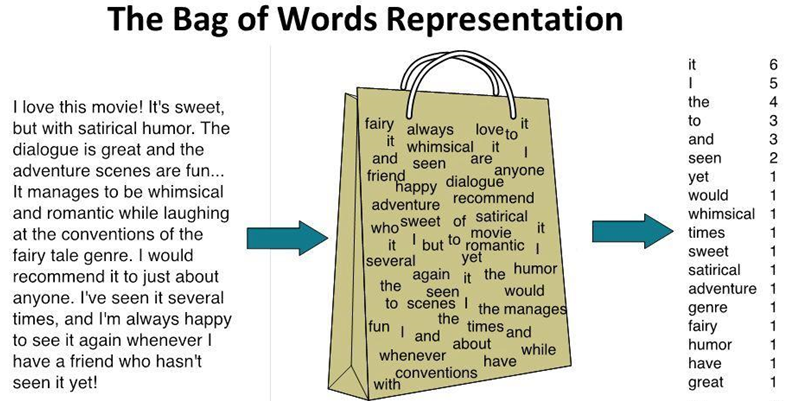

NLPにおける機械学習の応用:

**従来の手法**
- Bag-of-words モデルが主流

**現代の手法**
- シーケンスモデル(Sequence models)が主流
- 特に大規模言語モデル(Large Language Models)で活用


## 5 シーケンスモデル <a name='19.5-sequence-models-approach'></a> Sequence Models <a name='19.5-sequence-models-approach'></a>

**シーケンスモデル (Sequence models)**
テキストの全体を一度に処理し、入力テキスト内の単語の順序を保持できる手法。

シーケンスモデルの一般的な実装:
- テキストデータの単語を整数インデックスに変換
- 整数をベクトル表現にマッピング
- ベクトルをMLモデルに入力、順序を考慮して処理

シーケンスモデルの入力ベクトル表現:
- One-hot word vector (ワンホットベクトル)表現
- Word embeddings (単語埋め込み)表現

### ワンホットベクトル表現

**One-hot word vector (ワンホットベクトル)** は、カテゴリカル特徴量のone-hot encodingと同様の表現方法です。

- 各単語のインデックスを、以下のようなベクトルに変換:
    - 該当する単語の位置に `1 (hot)`
    - その他の位置に `0 (cold)`

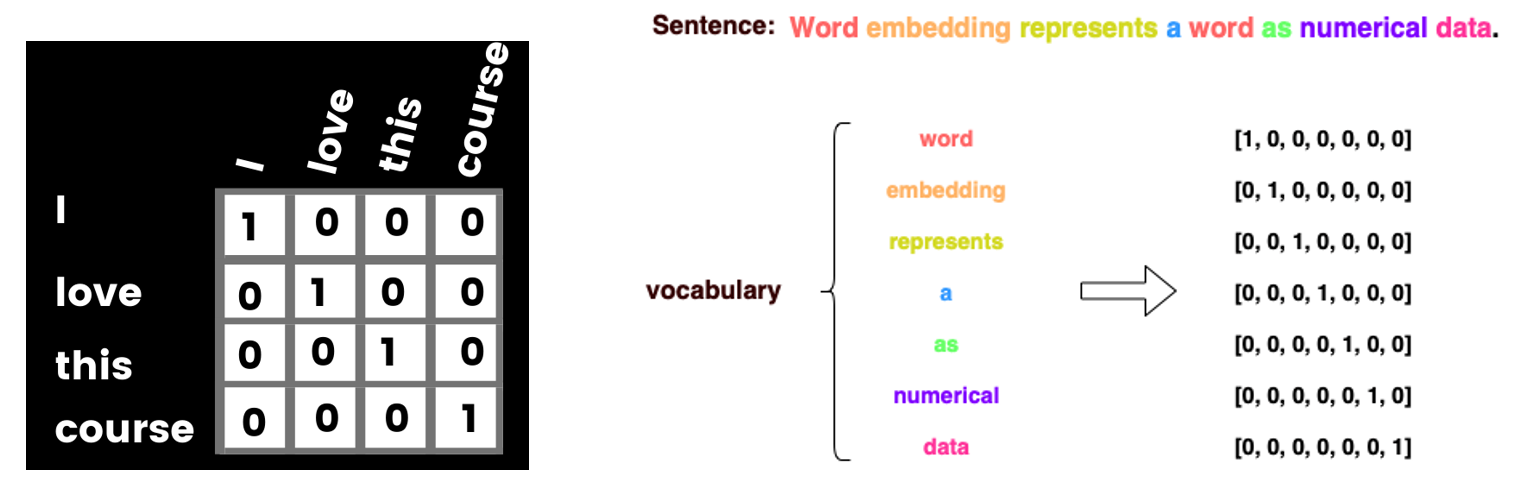
*図: One-hot word vector encoding (ワンホットベクトル エンコーディング)*

ワンホット単語ベクトルの問題点:
- 大規模テキストデータでは非効率
- 例: 20,000単語の場合、各単語に20,000次元のベクトルが必要
- トレーニングが遅く、メモリ消費が大きい

Word Embeddings (単語埋め込み)の利点:
- ベクトルサイズが語彙サイズより大幅に小さい
- 単語の意味的な関係を捉えることが可能
- 現代のNLPモデルで広く採用

### 5.1 単語埋め込み <a name='19.5.1-word-embeddings'></a>

**Word Embeddings (単語埋め込み)** は各単語をベクトルに変換する表現手法です。意味が近い単語同士は、埋め込み空間でも近い位置に配置されます。

主な特徴:
- 各単語が埋め込みベクトルで表現される
- 意味の近い単語のベクトルは空間的に近い
- ベクトルの次元数は通常 256〜1,024 程度
- 単語間の距離は Cosine Similarity (コサイン類似度) で計算　単語間の距離を計算する

主な手法:
- word2vec
- GloVe (Global Vectors)

利点:
- 単語の意味的な関係を捉えられる
- 事前学習済みの埋め込みを再利用可能
- 小規模データセットでも効果的

実践例:
- [Embedding Projector](http://projector.tensorflow.org) で視覚化が可能
- IMDB Reviews を使用した感情分析タスクで実装例を紹介

※技術用語:
- Embeddings space (埋め込み空間)
- Cosine similarity (コサイン類似度)
- Sentiment analysis (感情分析)


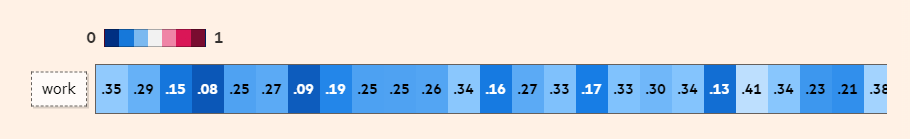
Figure: "work" を変換

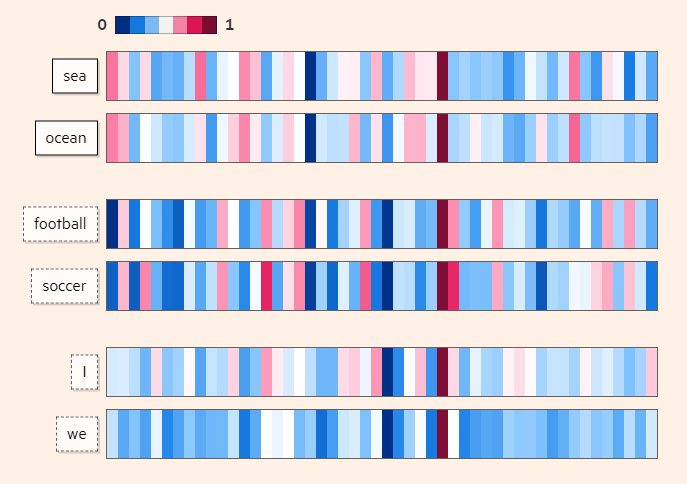

Figure:意味の近い単語の埋め込みベクトルは近い値をとる。


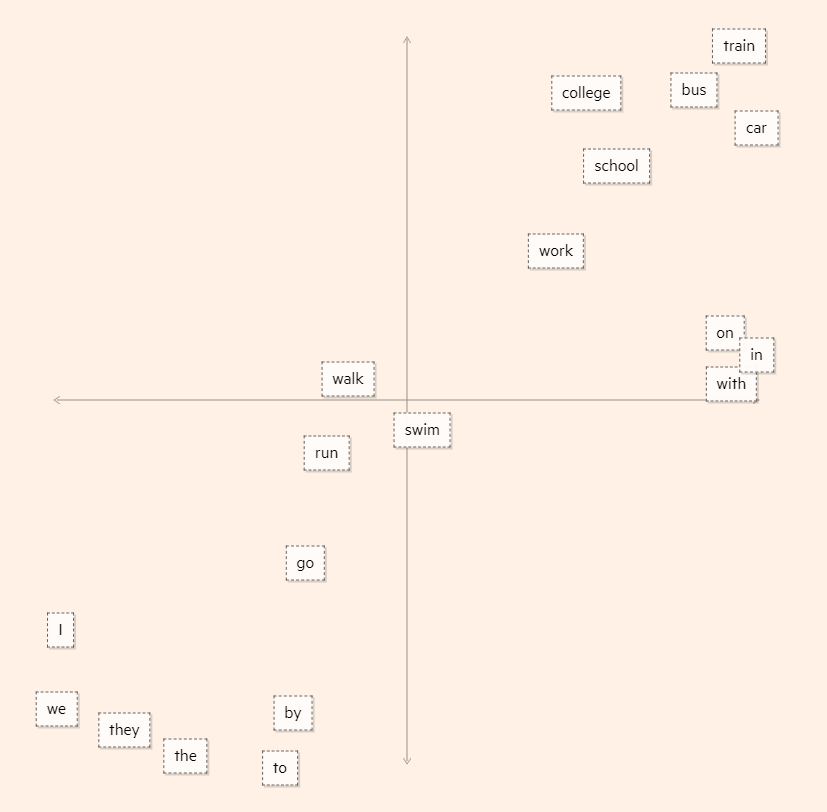
Figure: Word embeddings space.

#### IMDB映画レビューデータセットの読み込み

IMDBレビューデータセット:

- Keras内蔵のデータセットからダウンロード可能
- トレーニング用25,000件、検証用25,000件の映画レビュー
- `max_features=20000`で最頻出20,000語のみを使用
- その他の単語は語彙外(out-of-vocabulary)トークンとして扱う
- 各レビューにPositive/Negativeのラベル付け

データセットの形式:
- トレーニングデータと検証データは25,000要素のリストとして読み込まれる

In [ ]:
max_features = 20000

(train_data, train_labels), (val_data, val_labels) = keras.datasets.imdb.load_data(num_words=max_features)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(len(train_data))
print(len(val_data))

25000
25000


以下は映画レビューの一例です。
これは整数インデックスのリストです:
- 141個の単語を含む
- データセット内の単語は既に整数インデックスに変換済み

※技術用語:
- Movie review (映画レビュー)
- Integer indices (整数インデックス)

In [ ]:
# Display the third movie review
print('Number of words in the third review', len(train_data[2]))
print(train_data[2])

Number of words in the third review 141
[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5974, 54, 61, 369, 13, 71, 149, 14, 22, 112, 4, 2401, 311, 12, 16, 3711, 33, 75, 43, 1829, 296, 4, 86, 320, 35, 534, 19, 263, 4821, 1301, 4, 1873, 33, 89, 78, 12, 66, 16, 4, 360, 7, 4, 58, 316, 334, 11, 4, 1716, 43, 645, 662, 8, 257, 85, 1200, 42, 1228, 2578, 83, 68, 3912, 15, 36, 165, 1539, 278, 36, 69, 2, 780, 8, 106, 14, 6905, 1338, 18, 6, 22, 12, 215, 28, 610, 40, 6, 87, 326, 23, 2300, 21, 23, 22, 12, 272, 40, 57, 31, 11, 4, 22, 47, 6, 2307, 51, 9, 170, 23, 595, 116, 595, 1352, 13, 191, 79, 638, 89, 2, 14, 9, 8, 106, 607, 624, 35, 534, 6, 227, 7, 129, 113]


In [ ]:
# Display the first 10 train labels
train_labels[:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

#### データセットの準備

データの`pad_sequences`関数でパディング処理を行います:

- `maxlen=200`: 各映画レビューの最初の200単語を使用
- 200単語以上のレビューは切り捨て
- ほとんどのレビューは200単語未満
- トレードオフ:
    - 計算コスト
    - モデル性能

※技術用語:
- pad_sequences (パディング処理)
- maxlen (最大長)


In [ ]:
train_data = pad_sequences(train_data, maxlen=200)
val_data = pad_sequences(val_data, maxlen=200)

In [ ]:
# Print the shape of the padded train dataset
print('Shape of the train data:', train_data.shape)

Shape of the train data: (25000, 200)


次のセルでは、141単語の第3番目のレビューについて確認できます:
- 最初の59単語が0に置き換えられています
- 長さは200単語に調整されています

※技術用語:
- Review (レビュー)

In [ ]:
# Display the third movie review
print(train_data[2])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    1   14   47    8   30   31    7    4  249  108    7
    4 5974   54   61  369   13   71  149   14   22  112    4 2401  311
   12   16 3711   33   75   43 1829  296    4   86  320   35  534   19
  263 4821 1301    4 1873   33   89   78   12   66   16    4  360    7
    4   58  316  334   11    4 1716   43  645  662    8  257   85 1200
   42 1228 2578   83   68 3912   15   36  165 1539  278   36   69    2
  780    8  106   14 6905 1338   18    6   22   12  215   28  610   40
    6   87  326   23 2300   21   23   22   12  272   40   57   31   11
    4   22   47    6 2307   51    9  170   23  595  116  595 1352   13
  191   79  638   89    2   14    9    8  106  607  624   35  534    6
  227 

#### Keras の Embedding レイヤー

主な特徴:
- Keras の `Embedding` レイヤーは入力トークンをベクトル空間に投影
- 必要な設定:
    - データシーケンス内のトークン数
    - 埋め込みベクトルの次元数

動作の仕組み:
- 整数インデックスを入力として受け取る
- 埋め込みベクトルを出力
- ルックアップテーブルのように機能

使用例:
- 100単語の語彙を5次元ベクトルで表現
- インデックス1,2,3に対してランダムな値を割り当て
- 各インデックスに5次元ベクトルが対応
- モデル学習時に類似単語のベクトルは近接

※技術用語:
- Embedding layer (埋め込みレイヤー)
- Embedding space (埋め込み空間)
- Look-up table (ルックアップテーブル)

In [ ]:
from tensorflow.keras.layers import Embedding

# Embedding layer: represent a dataset with a vocabulary of 100 words with 5 dimensional vectors
embedding_layer = Embedding(input_dim=100, output_dim=5)

In [ ]:
# Input layer: list [1, 2, 3] coverted to TensorFlow tensor
input_layer = tf.convert_to_tensor([1, 2, 3])

# Inspect the input_layer
input_layer

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

In [ ]:
# Apply the Embedding layer
output_layer = embedding_layer(input_layer)

# Print the embedding vectors
output_layer.numpy()

array([[-0.01642751, -0.03613057,  0.02674179,  0.02308163, -0.03865197],
       [ 0.03135184,  0.04326766, -0.01544314, -0.00839823, -0.04862347],
       [ 0.04177303, -0.01579628, -0.00822372, -0.00711039, -0.03730132]],
      dtype=float32)

#### モデルの定義、コンパイル、トレーニング

次のステップ:

- `Embedding` レイヤーを使用
- 入力シーケンスの単語を8次元ベクトルに変換
- Dense レイヤーで処理
- 最後のレイヤーで映画レビューのラベルを予測

分類タスクの詳細:
- 2値分類問題
- ポジティブ/ネガティブの2つのラベル

※技術用語:
- Embedding layer (埋め込みレイヤー)
- Dense layer (全結合レイヤー)
- Binary classification (2値分類)

In [ ]:
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

max_features = 20000   # Vocabulary size
embedding_dim = 8      # Embedding dimension

# Define the layers in the model
input_layer = Input(shape=(200,))
embedding_layer = Embedding(input_dim=max_features, output_dim=embedding_dim)(input_layer)
flatten_layer = Flatten()(embedding_layer)
dense_layer = Dense(32, activation='relu')(flatten_layer)
dropout_layer = Dropout(0.5)(dense_layer)
output_layer = Dense(1, activation='sigmoid')(dropout_layer)

# Create the model with inputs and outputs
model = Model(inputs=input_layer, outputs=output_layer)

モデルのコンパイル:

- 損失関数: `binary_crossentropy` (2値分類用)
    - ポジティブ/ネガティブの2つのラベル

- 最適化アルゴリズム: `adam` optimizer

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

モデルをトレーニングする前に、モデルのサマリー(summary)を確認します。

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_1 (Embedding)              │ (None, 200, 8)              │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          51,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 211,265 (825.25 KB)

 Trainable params: 211,265 (825.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_data, train_labels, validation_data = (val_data, val_labels), epochs=5)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6343 - loss: 0.5979 - val_accuracy: 0.8658 - val_loss: 0.3126
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9191 - loss: 0.2187 - val_accuracy: 0.8617 - val_loss: 0.3281
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9661 - loss: 0.1085 - val_accuracy: 0.8567 - val_loss: 0.4006
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9887 - loss: 0.0457 - val_accuracy: 0.8522 - val_loss: 0.5079
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9938 - loss: 0.0230 - val_accuracy: 0.8487 - val_loss: 0.5701


### 5.2 TextVectorization レイヤーの使用 <a name='19.5.2-using-textvectorization-layer'></a>

### TextVectorization レイヤー

Kerasは`TextVectorization`レイヤーを提供:
- テキストのトークン化と数値化を行う
- ニューラルネットワークの一部として直接使用可能

主な処理ステップ:
- テキストの標準化(句読点削除、小文字化)
- 文章のトークン化
- トークンの数値表現への変換

`TextVectorization`の特徴:
- `Tokenizer`関数と同様の機能
- モデルに直接組み込み可能
- エンドツーエンドのパイプラインに最適

主なパラメータ:
- *max_tokens*: 語彙の最大単語数
- *standardize*: 標準化の方法を指定
- *split*: テキスト分割方法を指定
- *output_sequence_length*: シーケンスの長さを指定

※技術用語:
- TextVectorization layer (テキストベクトル化レイヤー)
- End-to-end pipeline (エンドツーエンドパイプライン)
- Vocabulary (語彙)

In [ ]:
from tensorflow.keras.layers import TextVectorization

text_vect_layer = TextVectorization(max_tokens=1000, output_sequence_length=10)

In [ ]:
# Sample sentences
sentences = ['TensorFlow is a deep learning library!',
             'Is TensorFlow powered by Keras API?']

`adapt()`メソッドは`TextVectorization`レイヤーに文章を適合させるために使用されます。

`adapt()`メソッドの機能:
- 頻出トークンから語彙を作成
- トークンと整数インデックスのマッピングを作成
- テキストを数値表現に変換するために使用

※技術用語:
- adapt() method (`adapt()`メソッド)
- TextVectorization layer (テキストベクトル化レイヤー)
- Vocabulary (語彙)
- Token (トークン)

In [ ]:
text_vect_layer.adapt(sentences)

In [ ]:
# Vectorize the above sentences and display the output
vectorized_sentences = text_vect_layer(sentences)
print(vectorized_sentences)

tf.Tensor(
[[ 2  3 11  8  6  5  0  0  0  0]
 [ 3  2  4  9  7 10  0  0  0  0]], shape=(2, 10), dtype=int64)


In [ ]:
# Get the vocabulary from the TextVectorization layer
vocab = text_vect_layer.get_vocabulary()

# Print each word and its corresponding index
vocab

['',
 '[UNK]',
 'tensorflow',
 'is',
 'powered',
 'library',
 'learning',
 'keras',
 'deep',
 'by',
 'api',
 'a']

サンプル文を使って出力を確認してみましょう。

In [ ]:
sample_sentence = 'Tensorflow is a machine learning framework!'

vectorized_sentence = text_vect_layer([sample_sentence])

In [ ]:
print('Orginal sentence:', sample_sentence)
print('Vectorized sentence:', vectorized_sentence)

Orginal sentence: Tensorflow is a machine learning framework!
Vectorized sentence: tf.Tensor([[ 2  3 11  1  6  1  0  0  0  0]], shape=(1, 10), dtype=int64)


- 単語`'machine'`と`'framework'`は、レイヤーに渡した`sentences`に含まれていないため、語彙(vocabulary)になく、ベクトル化された出力では両方とも`1`で表現されます
    - インデックス1は語彙外(oov_token)の単語用に予約されています

- 出力は0でパディング(padding)され、出力シーケンスの長さは10に設定されています

- TextVectorization レイヤーの利点:
    - 必要なテキスト前処理を一度に実行
    - モデル内で直接使用可能


### 5.3 RNNによるシーケンスモデリング <a name='19.5.3-sequence-modeling-with-recurrent-neural-networks'></a>

**Recurrent Neural Networks (RNN・リカレントニューラルネットワーク)**

シーケンシャルデータを処理するためのニューラルネットワークアーキテクチャ

シーケンシャルデータの例:
- 時系列データ (Time-series)
- テキスト (文字や単語の列)
- 音声 (音波の列)
- 動画 (画像の列)
- 遺伝子配列 (DNA配列)

データの順序を保持することが重要:
例: "Today, I took my cat for a [....]"
- 次の単語を予測するには、文の最初から最後までの流れを把握する必要がある

RNNの特徴:
- 従来のフィードフォワードネットワークとは異なる
- 各時間ステップでフィードバックループを持つ
- 単語間の依存関係を学習可能

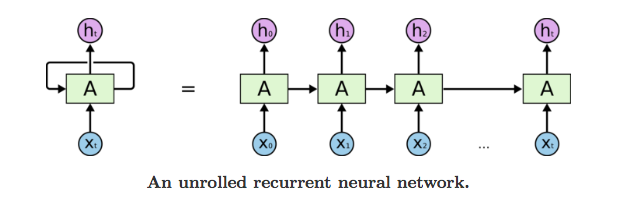

*図: Recurrent Neural Network (リカレントニューラルネットワーク)*


### RNNの種類

**主な3つのタイプ:**
- SimpleRNN (基本的なRNN)　短い文章の予測はできる。
- LSTM (Long Short-Term Memory)
- GRU (Gated Recurrent Units)

**SimpleRNN vs LSTM/GRU:**
- SimpleRNN: 長いシーケンスの処理が苦手
- LSTM/GRU: 長期的な依存関係を保持可能

**LSTM/GRUの特徴:**
- 複数のゲートで情報の流れを制御
- LSTMの構成:
    - Input gate (入力ゲート)
    - Output gate (出力ゲート)
    - Forget gate (忘却ゲート)
    - Memory cell (メモリセル)

※次のセクションでは、LSTMを使用したテキスト分類モデルを実装します

#### データの読み込み

### AG News データセットの使用

**データセット概要:**
- AG News: 2,000以上のニュースソースから収集
- 4つのカテゴリに分類:
    - World (世界): 0
    - Sports (スポーツ): 1
    - Business (ビジネス): 2
    - Sci/Tech (科学技術): 3

**データ量:**
- トレーニングデータ: 120,000件
- テストデータ: 7,600件

**データ読み込みの設定:**
- `with_info=True`: データセット情報を取得
- `as_supervised=True`: (入力,ターゲット)のペアで読み込み

In [ ]:
import tensorflow_datasets as tfds
import pandas as pd

In [ ]:
(train_data, val_data), info = tfds.load('ag_news_subset:1.0.0', #version 1.0.0
                                         split=['train', 'test'],
                                         with_info=True,
                                         as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/120000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/ag_news_subset/incomplete.PH2ZSA_1.0.0/ag_news_subset-train.tfrecord*...: …

Generating test examples...:   0%|          | 0/7600 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/ag_news_subset/incomplete.PH2ZSA_1.0.0/ag_news_subset-test.tfrecord*...:  …

Dataset ag_news_subset downloaded and prepared to /root/tensorflow_datasets/ag_news_subset/1.0.0. Subsequent calls will reuse this data.


`info`を使用してデータセットの基本情報を確認できます。

In [ ]:
# Displaying the classes
class_names = info.features['label'].names
print(class_names)

['World', 'Sports', 'Business', 'Sci/Tech']


In [ ]:
print('Number of training samples:', info.splits['train'].num_examples)
print('Number of validation samples:', info.splits['test'].num_examples)

Number of training samples: 120000
Number of validation samples: 7600


`tfds.as_dataframe`を使用して最初の10件のニュース記事を Pandas DataFrameとして表示します。


In [ ]:
news_df = tfds.as_dataframe(train_data.take(10), info)

news_df

,description,label
0,"AMD #39;s new dual-core Opteron chip is designed mainly for corporate computing applications, including databases, Web services, and financial transactions.",3 (Sci/Tech)
1,Reuters - Major League Baseball\Monday announced a decision on the appeal filed by Chicago Cubs\pitcher Kerry Wood regarding a suspension stemming from an\incident earlier this season.,1 (Sports)
2,"President Bush #39;s quot;revenue-neutral quot; tax reform needs losers to balance its winners, and people claiming the federal deduction for state and local taxes may be in administration planners #39; sights, news reports say.",2 (Business)
3,"Britain will run out of leading scientists unless science education is improved, says Professor Colin Pillinger.",3 (Sci/Tech)
4,"London, England (Sports Network) - England midfielder Steven Gerrard injured his groin late in Thursday #39;s training session, but is hopeful he will be ready for Saturday #39;s World Cup qualifier against Austria.",1 (Sports)
5,TOKYO - Sony Corp. is banking on the \$3 billion deal to acquire Hollywood studio Metro-Goldwyn-Mayer Inc...,0 (World)
6,"Giant pandas may well prefer bamboo to laptops, but wireless technology is helping researchers in China in their efforts to protect the engandered animals living in the remote Wolong Nature Reserve.",3 (Sci/Tech)
7,"VILNIUS, Lithuania - Lithuania #39;s main parties formed an alliance to try to keep a Russian-born tycoon and his populist promises out of the government in Sunday #39;s second round of parliamentary elections in this Baltic country.",0 (World)
8,Witnesses in the trial of a US soldier charged with abusing prisoners at Abu Ghraib have told the court that the CIA sometimes directed abuse and orders were received from military command to toughen interrogations.,0 (World)
9,"Dan Olsen of Ponte Vedra Beach, Fla., shot a 7-under 65 Thursday to take a one-shot lead after two rounds of the PGA Tour qualifying tournament.",1 (Sports)


データの内容を理解できたので、LSTMによるニュース分類の前にデータの準備を行います。

#### データの準備

データ準備のポイント:

- `train_data`と`val_data`には入力テキストとラベルのペアが含まれる

- 以下の変換を実施:
    - 入力テキストとラベルを分離
    - TensorFlow tensors (テンソル)に変換
    - `convert_to_tensor`関数を使用

In [ ]:
# Function to load the data as TensorFlow tensors
def load_data(dataset):
    inputs, labels = [], []
    for input_text, label in tfds.as_numpy(dataset):
        inputs.append(input_text)
        labels.append(label)
    return tf.convert_to_tensor(inputs, dtype=tf.string), tf.convert_to_tensor(labels)

# Load training and validation data directly as tensors
train_inputs, train_labels = load_data(train_data)
val_inputs, val_labels = load_data(val_data)

トレーニングデータとバリデーションデータの形状を確認しましょう。

In [ ]:
print("Training inputs shape:", train_inputs.shape)
print("Training labels shape:", train_labels.shape)
print("Validation inputs shape:", val_inputs.shape)
print("Validation labels shape:", val_labels.shape)

Training inputs shape: (120000,)
Training labels shape: (120000,)
Validation inputs shape: (7600,)
Validation labels shape: (7600,)


次のセルで入力データの型が `tf.string` であることを確認できます。

In [ ]:
train_inputs.dtype

tf.string

テキストデータのトークン化には Keras の TextVectorization レイヤーを使用します。その後、トレーニングデータの前処理に `adapt()` メソッドを適用します。

In [ ]:
vocab_size = 20000

text_vect_layer = TextVectorization(max_tokens=vocab_size)

In [ ]:
text_vect_layer.adapt(train_inputs)

- 2つのニュース記事を`text_vect_layer`に渡すと、ベクトル化されたシーケンスは最大長の文章に合わせてパディングされます

- 固定長のパディングシーケンスが必要な場合は、レイヤーの初期化時に`output_sequence_length`を指定することができます

In [ ]:
sample_news = ['This weekend there is a sport match between Man U and Fc Barcelona',
               'Tesla has unveiled its humanoid robot that appeared dancing during the show!']

In [ ]:
vectorized_news = text_vect_layer(sample_news)
vectorized_news.numpy()

array([[   40,   491,   185,    16,     3,  1559,   560,   163,   362,
        13418,     7,  7381,  2517],
       [    1,    20,   878,    14,     1,  4663,    10,  1249, 11657,
          159,     2,   541,     0]])

注目ポイント:
- 2番目の文は0でパディングされています
- `Tesla`と`humanoid`は訓練データに含まれていないため、インデックス1が付与されています

#### モデルの作成とトレーニング

モデルの構成:

* `Input layer`(入力レイヤー): 文字列タイプ(tf.string)のテキストシーケンスを受け取る

* `TextVectorization layer`(テキストベクトル化レイヤー): 入力テキストをトークンに変換

* `Embedding layer`(埋め込みレイヤー): トークンを学習可能な埋め込みベクトルで表現

* `LSTM layer`(LSTMレイヤー): シーケンスの処理を担当
    - Bidirectional(双方向)層でラップ
    - 順方向と逆方向の両方からシーケンスを処理
    - 2つのLSTMの出力を結合

* `Dense layer`(全結合レイヤー): 分類を実行

In [ ]:
from tensorflow.keras.layers import Bidirectional, LSTM

embedding_dim = 64

# Define model layers
inputs = Input(shape=(1,), dtype=tf.string)
x = text_vect_layer(inputs)
x = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(x)
x = Bidirectional(LSTM(64))(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(4, activation='softmax')(x)

# Define the model
model = Model(inputs=inputs, outputs=outputs)

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_inputs, train_labels, validation_data=(val_inputs, val_labels), epochs=3, batch_size=32)

Epoch 1/3
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.8131 - loss: 0.4757 - val_accuracy: 0.9108 - val_loss: 0.2660
Epoch 2/3
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 39s 10ms/step - accuracy: 0.9310 - loss: 0.2008 - val_accuracy: 0.9111 - val_loss: 0.2561
Epoch 3/3
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.9487 - loss: 0.1454 - val_accuracy: 0.9109 - val_loss: 0.2708


モデルをニュース記事で評価してみましょう

In [ ]:
# Predicting the class of new news articles
sample_news_1 = tf.convert_to_tensor(['The self driving car company Tesla has unveiled its humanoid robot at a recent event!'])

# make predictions on the sample_news 1
predictions_1 = model.predict(sample_news_1)
print(predictions_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
[[0.0223692  0.02970381 0.36633036 0.5815966 ]]


モデルは、このニュース記事が科学技術 (Tech/Science) に関連していることを正しく予測しました。

In [ ]:
# find the index of the predicted class
predicted_class_1 = np.argmax(predictions_1)

print('Predicted class:', predicted_class_1)
print('Predicted class name:', class_names[predicted_class_1])

Predicted class: 3
Predicted class name: Sci/Tech


次のセルでもう1つの例を紹介します。

In [ ]:
# Predicting the class of new news
sample_news_2 = tf.convert_to_tensor(['This weekend there is a match between two big footbal teams in the national league'])

predictions_2 = model.predict(sample_news_2)

predicted_class_2 = np.argmax(predictions_2)

print('Predicted class:', predicted_class_2)
print('Predicted class name:', class_names[predicted_class_2])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted class: 1
Predicted class name: Sports


[BACK TO TOP](#top)